# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import tree
from __future__ import print_function

In [5]:
#Reading data
crops=pd.read_csv('Crop_recommendation.csv'
)

In [6]:
crops.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
crops.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [8]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
crops.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [10]:
crops['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

<Axes: >

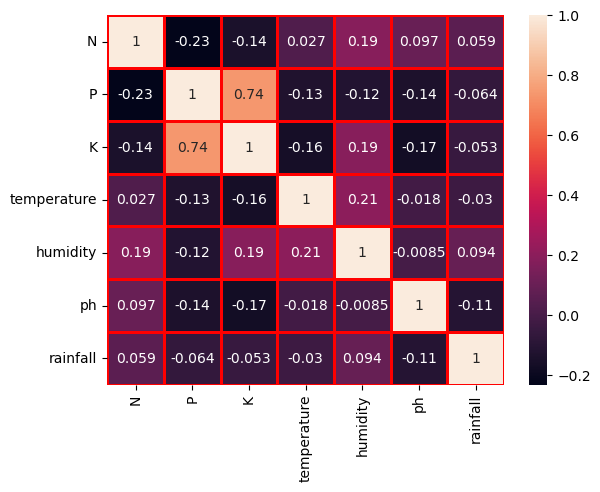

In [11]:
# Making a heatmap of the dataset correlation : including only numerical data
linewidth = 2
linecolor = "red"

sns.heatmap(data=crops.select_dtypes(include='number').corr(),
            annot=True, 
            linewidth = linewidth, 
            linecolor = linecolor)

# Data Cleaning

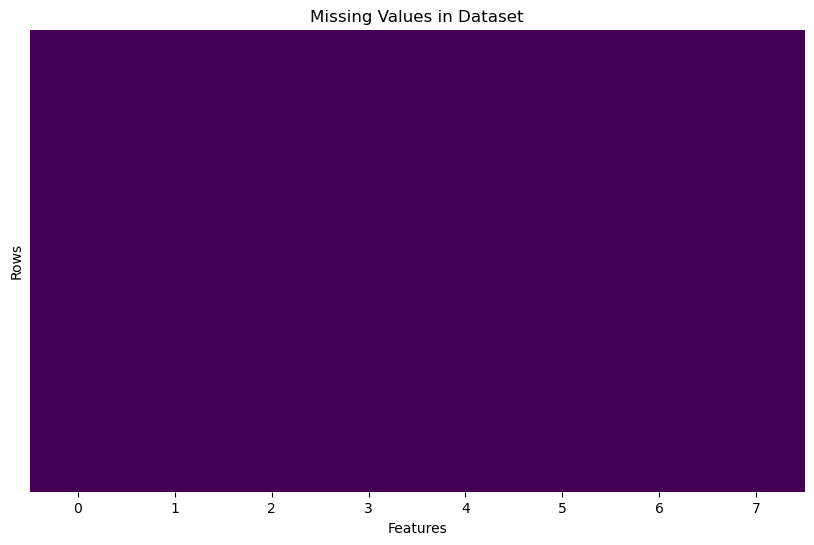

In [12]:
#Checking For Missing Values if any in our dataset 
missing_values = crops.isnull().values

# Create a heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values in Dataset')
plt.xlabel('Features')
plt.ylabel('Rows')
plt.show()

# Pairplotting

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


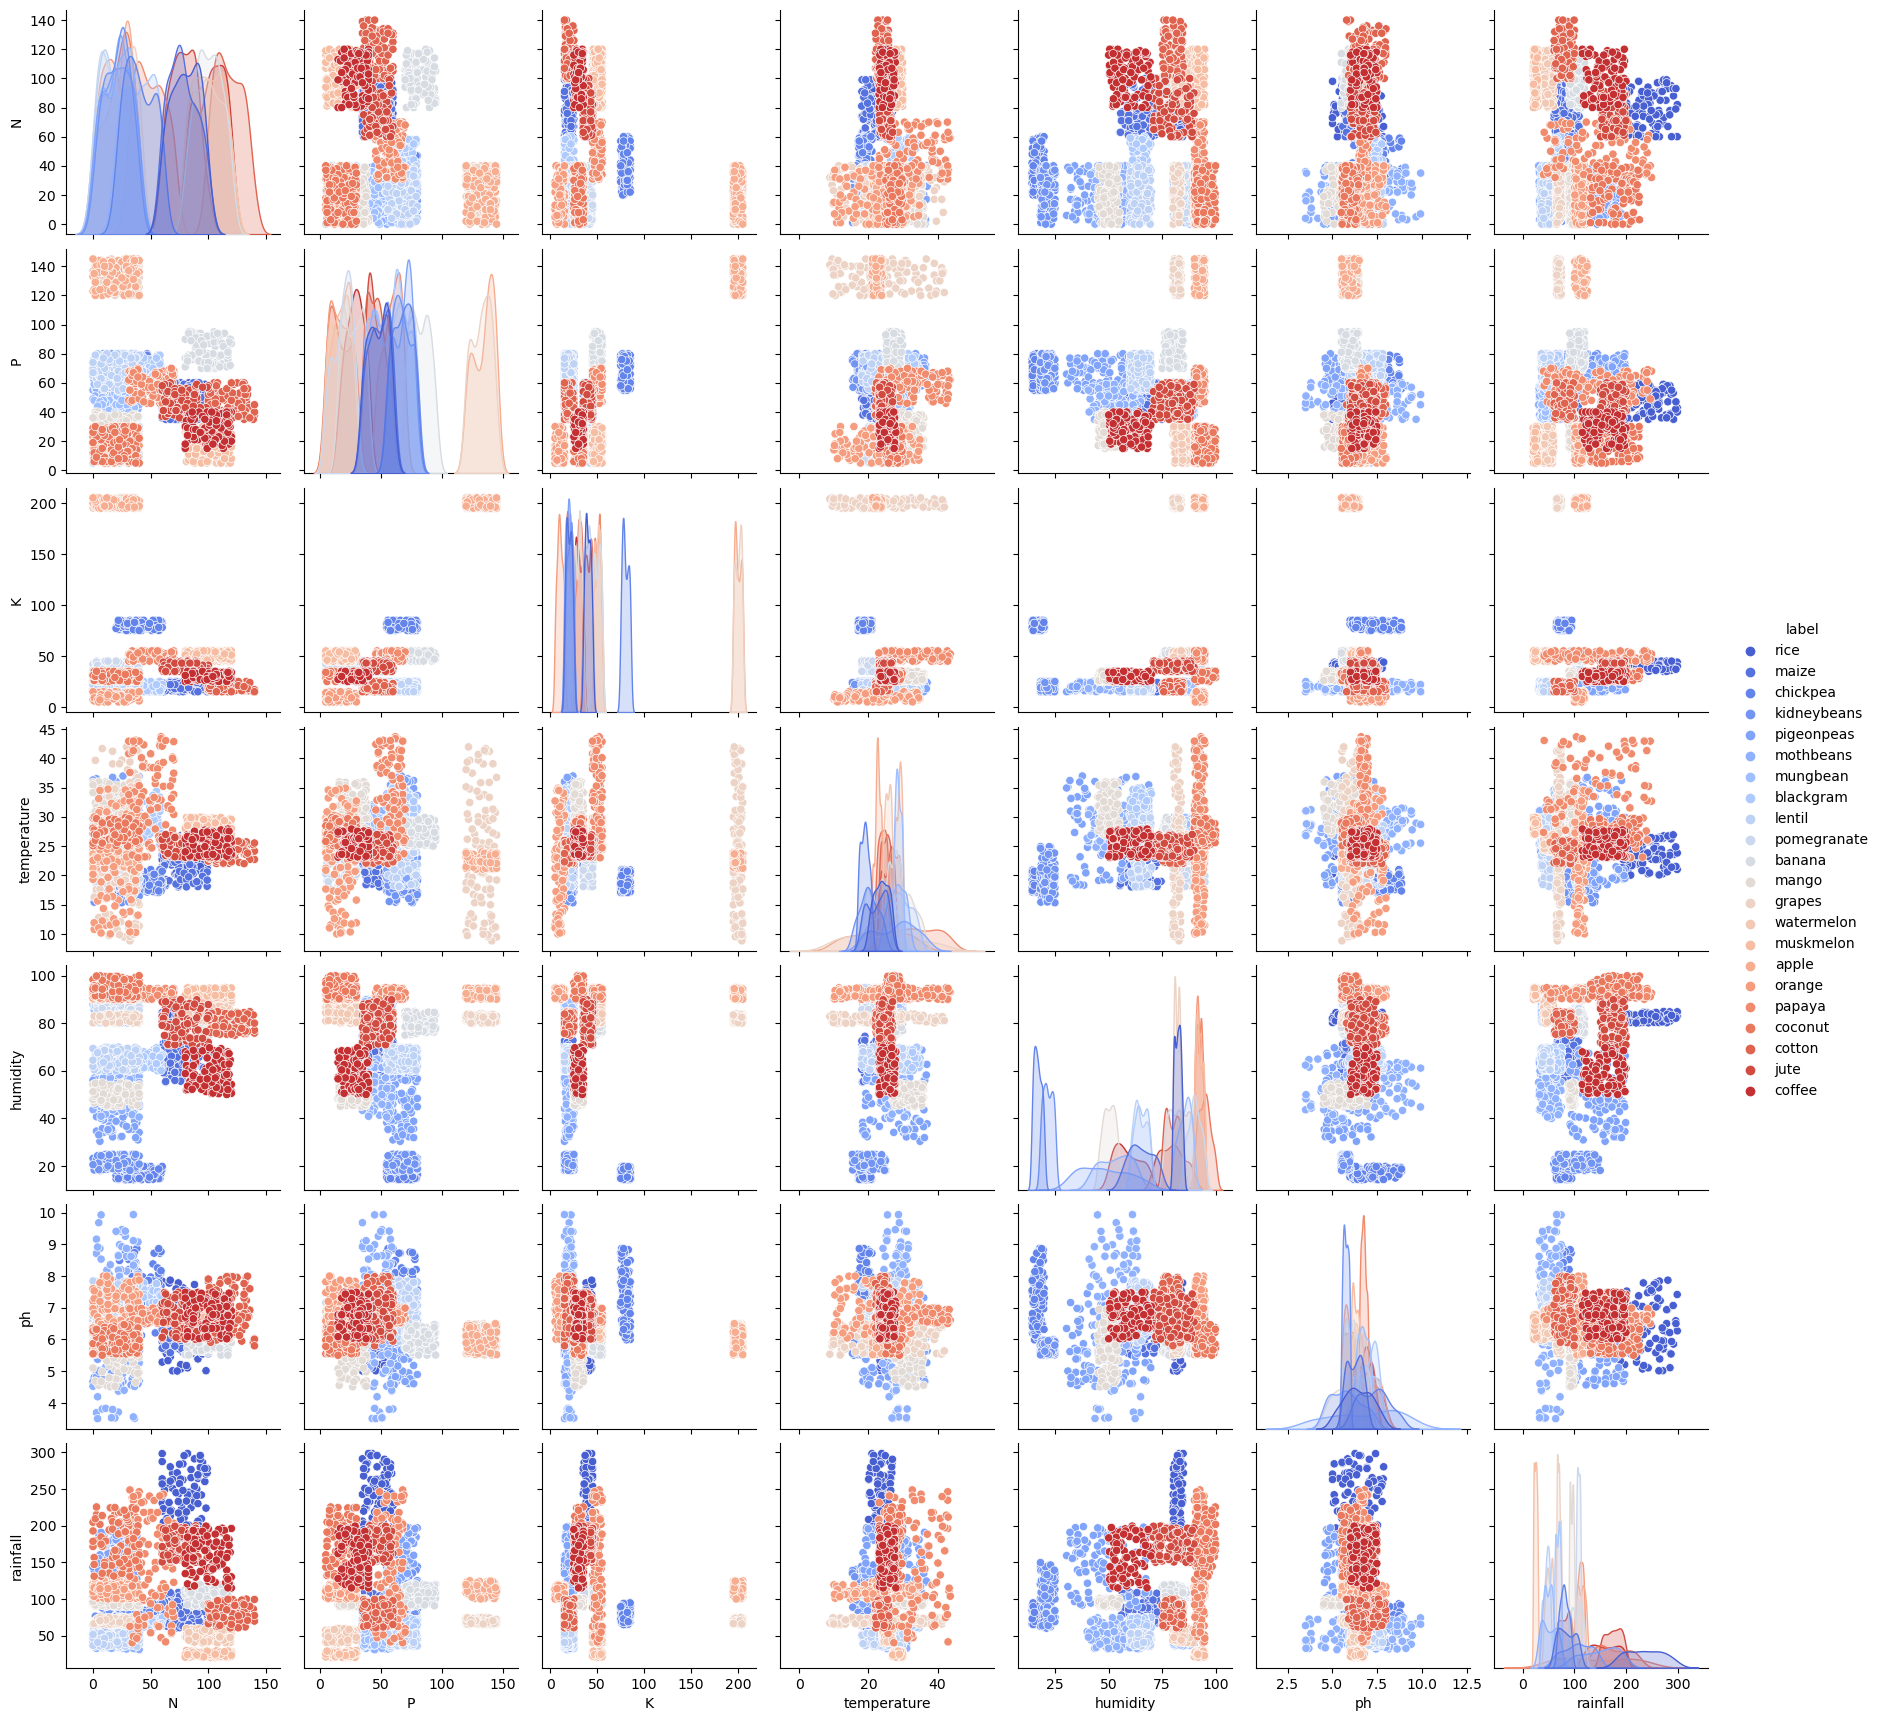

In [13]:
#Checking relation between each crops and respective features
sns.pairplot(crops, hue='label',palette='coolwarm')

# Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
features = crops[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
target = crops['label']D

xtrain, xtest, ytrain, ytest = train_test_split(features,
                                                target,
                                                test_size = 0.2,
                                                random_state = None)

In [15]:
# Defining a dictionary such that key = modelname and value = accuracy of the model
best_model = {}


# Cross Validation Accuracy

In [17]:
from sklearn.model_selection import cross_val_score

def cross_val_accuracy(model):
    # This function calculates the mean cross validation accuracy
    score = cross_val_score(model, features, target,cv=5)
    #get the mean of each fold 
    return score.mean() * 100

# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale the data using StandardScaler
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

# Create an instance of LogisticRegression
logreg = LogisticRegression(max_iter=1000)

# Fit the model to the scaled training data
logreg.fit(xtrain_scaled, ytrain)

# Use the model to make predictions on the test data
ypred = logreg.predict(xtest_scaled)

# Classfication Report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,ypred))


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        11
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.83      0.91        24
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        14
      coffee       1.00      1.00      1.00        18
      cotton       0.94      1.00      0.97        16
      grapes       1.00      1.00      1.00        25
        jute       0.90      1.00      0.95        27
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.74      0.93      0.82        15
       maize       1.00      0.94      0.97        18
       mango       1.00      1.00      1.00        23
   mothbeans       0.95      0.90      0.93        21
    mungbean       1.00      1.00      1.00        22
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        22
      papaya       1.00    

In [21]:
from sklearn import metrics
accuracy = metrics.accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy}",end='\n\n')

# Adding the model to our dictionary
best_model["Logistic Regression"] = accuracy*100
print(best_model)

Accuracy: 0.975

{'Logistic Regression': 97.5}


In [22]:
from sklearn.pipeline import make_pipeline

# Create a pipeline with data scaling and logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Perform cross-validation and calculate accuracy
score = cross_val_score(pipeline, features, target, cv=5, scoring='accuracy')

# Print the cross-validation accuracy scores
print("Cross-Validation Accuracy Scores:", score.mean() * 100)

Cross-Validation Accuracy Scores: 97.13636363636363


# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion = "entropy",
                                     random_state = None,
                                     max_depth = 5)
# Fitting the training set to create a model
DecisionTree.fit(xtrain,ytrain)
# Using test(x) to find y
ypred = DecisionTree.predict(xtest)

# Classfication Report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,ypred))


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      0.81      0.89        21
   blackgram       0.70      1.00      0.82        23
    chickpea       1.00      0.90      0.95        20
     coconut       0.95      1.00      0.97        18
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        19
        jute       0.48      1.00      0.65        15
 kidneybeans       0.00      0.00      0.00        25
      lentil       0.56      1.00      0.72        22
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        14
   mothbeans       0.00      0.00      0.00        23
    mungbean       0.96      1.00      0.98        22
   muskmelon       1.00      1.00      1.00        19
      orange       1.00      1.00      1.00        15
      papaya       1.00    

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
# Checking whether the predicted y for test(x) matches actual test(y)
accuracy = metrics.accuracy_score(ypred,ytest)
print(f"Accuracy: {accuracy}",end='\n\n')

# Adding the model to our dictionary
best_model["Decision Tree"] = accuracy*100
print(best_model)

Accuracy: 0.8477272727272728

{'Logistic Regression': 97.5, 'Decision Tree': 84.77272727272728}


In [31]:
print(f"Cross Validation Accuracy {cross_val_accuracy(DecisionTree)}")

Cross Validation Accuracy 91.45454545454544


# Random Forest 

In [33]:
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier(n_estimators=20, random_state=None)

# Fitting the training set to create a model
RandomForest.fit(xtrain,ytrain)
# Using test(x) to find y
ypred = RandomForest.predict(xtest)

# Classfication Report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        23
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        18
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        19
        jute       0.88      1.00      0.94        15
 kidneybeans       1.00      1.00      1.00        25
      lentil       0.96      1.00      0.98        22
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        14
   mothbeans       1.00      0.96      0.98        23
    mungbean       1.00      1.00      1.00        22
   muskmelon       1.00      1.00      1.00        19
      orange       1.00      1.00      1.00        15
      papaya       1.00    

In [34]:

accuracy = metrics.accuracy_score(ypred, ytest)
print(f"Accuracy: {accuracy}",end='\n\n')

# Adding the model to our dictionary
best_model["Random Forest"] = accuracy*100
print(best_model)

Accuracy: 0.9931818181818182

{'Logistic Regression': 97.5, 'Decision Tree': 84.77272727272728, 'Random Forest': 99.31818181818181}


In [35]:
print(f"Cross Validation Accuracy {cross_val_accuracy(RandomForest)}")

Cross Validation Accuracy 99.36363636363637


# Support Vector Machine

In [38]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(xtrain)
x_train_norm = norm.transform(xtrain)
# transform testing dataabs
x_test_norm = norm.transform(xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(x_train_norm,ytrain)
ypred = SVM.predict(x_test_norm)

# Classfication Report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        21
   blackgram       1.00      0.96      0.98        23
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        18
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        19
        jute       0.75      1.00      0.86        15
 kidneybeans       1.00      1.00      1.00        25
      lentil       0.96      1.00      0.98        22
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        14
   mothbeans       1.00      1.00      1.00        23
    mungbean       1.00      1.00      1.00        22
   muskmelon       1.00      1.00      1.00        19
      orange       1.00      1.00      1.00        15
      papaya       1.00    

In [39]:
accuracy = metrics.accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy}",end='\n\n')

# Adding the model to our dictionary
best_model["SVM"] = accuracy*100
print(best_model)

Accuracy: 0.9863636363636363

{'Logistic Regression': 97.5, 'Decision Tree': 84.77272727272728, 'Random Forest': 99.31818181818181, 'SVM': 98.63636363636363}


In [40]:
print(f"Cross Validation Accuracy {cross_val_accuracy(SVM)}")

Cross Validation Accuracy 98.27272727272728


# Gaussian Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

# Fitting the training set to create a model
NaiveBayes.fit(xtrain,ytrain)
# Using test(x) to find y
ypred = NaiveBayes.predict(xtest)

# Classfication Report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        11
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        24
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        14
      coffee       1.00      1.00      1.00        18
      cotton       0.94      1.00      0.97        16
      grapes       1.00      1.00      1.00        25
        jute       0.96      1.00      0.98        27
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        15
       maize       1.00      0.94      0.97        18
       mango       1.00      1.00      1.00        23
   mothbeans       1.00      1.00      1.00        21
    mungbean       1.00      1.00      1.00        22
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        22
      papaya       1.00    

In [31]:
 accuracy = metrics.accuracy_score(ypred,ytest)
print(f"Accuracy: {accuracy}",end='\n\n')

# Adding the model to our dictionary
best_model["Naive Bayes"] = accuracy*100
print(best_model)

Accuracy: 0.05

{'Logistic Regression': 97.5, 'Naive Bayes': 5.0}


In [32]:
print(f"Cross Validation Accuracy {cross_val_accuracy(NaiveBayes)}")

Cross Validation Accuracy 99.50000000000001


In [ ]:
from sklearn import metrics
accuracy = metrics.accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy}",end='\n\n')

# Adding the model to our dictionary
best_model["XGB REGRESSION MODEL"] = accuracy*100
print(best_model)

In [ ]:
print(f"Cross Validation Accuracy {cross_val_accuracy(SVM)}")

# Comparing All Models

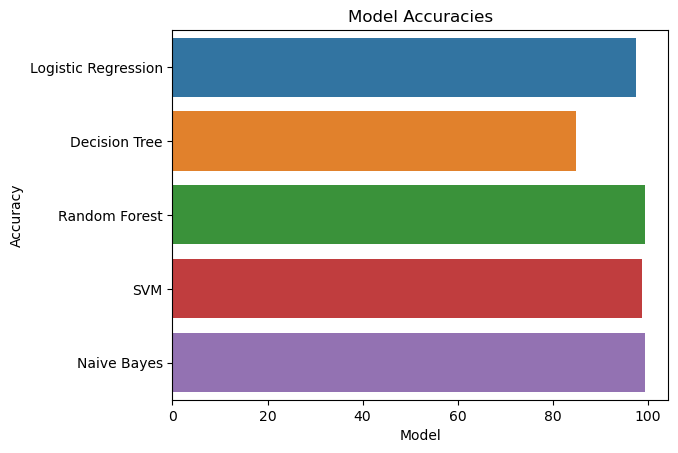

In [45]:
accuracies = list(best_model.values())
model_names = list(best_model.keys())

# Create a bar plot using seaborn
sns.barplot(x=accuracies, y=model_names)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.show()

In [46]:
max_key = max(best_model, key=best_model.get)
max_value = best_model[max_key]

print(f"Key: {max_key}, Value: {max_value}")

Key: Random Forest, Value: 99.31818181818181


# Using the model

# Example 1

In [48]:
# Randomly select one row from the DataFrame
random_row = crops.sample(n=1)

print(random_row)

# Extract the values of 'N', 'P', 'K', 'temperature', 'humidity', 'ph', and 'rainfall' from the random row
random_values = random_row[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].values

     N   P   K  temperature   humidity        ph    rainfall       label
453  5  55  18    33.508764  45.709761  7.322098  126.673812  pigeonpeas


In [49]:
data = np.array(random_values)
data_with_feature_names = pd.DataFrame(data, columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
prediction = RandomForest.predict(data_with_feature_names)
print(prediction)

['pigeonpeas']


# Example 2

In [52]:

random_row = crops.sample(n=1)

print(random_row)

# Extract the values of 'N', 'P', 'K', 'temperature', 'humidity', 'ph', and 'rainfall' from the random row
random_values = random_row[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].values

      N   P   K  temperature  humidity        ph   rainfall   label
890  37  77  20     25.93382  68.70533  7.080506  51.023728  lentil


In [53]:
data = np.array(random_values)
data_with_feature_names = pd.DataFrame(data, columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
prediction = RandomForest.predict(data_with_feature_names)
print(prediction)

['lentil']
